In [37]:
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Install required packages (run this cell once)
!pip install beautifulsoup4 requests lxml

# Import the libraries
import requests
from bs4 import BeautifulSoup


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [38]:
!pip install openpyxl
df = pd.read_excel(r"C:\Users\osaze\OneDrive\Desktop\Python\Datasets\Player Standard Stats FBref.xlsx")
df.head()
df.columns

Defaulting to user installation because normal site-packages is not writeable


Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY',
       'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1',
       'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'Matches'],
      dtype='object')

In [39]:
df['Nation'].unique()
df['Nation'] = df['Nation'].str[-3:]

              Squad   Age
8            Fulham  26.7
14    Newcastle Utd  26.6
18         West Ham  26.6
19           Wolves  25.9
7           Everton  25.8
1       Aston Villa  25.8
9      Ipswich Town  25.6
15  Nott'ham Forest  25.6
11        Liverpool  25.6
10   Leicester City  25.4
6    Crystal Palace  25.4
0           Arsenal  25.0
12  Manchester City  24.9
16      Southampton  24.8
13   Manchester Utd  24.3
4          Brighton  24.3
2       Bournemouth  24.1
3         Brentford  24.0
17        Tottenham  23.9
5           Chelsea  22.4


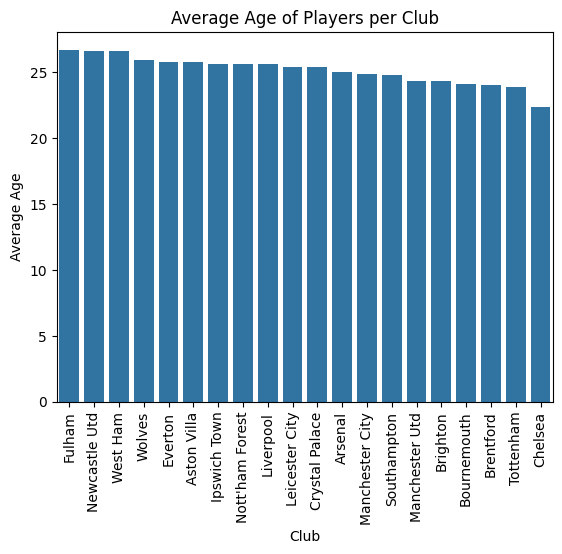

In [40]:
##i. Average age of players
avg_age_per_club = df.groupby('Squad')['Age'].mean().round(1).reset_index().sort_values(by='Age', ascending=False)
print(avg_age_per_club)

sns.barplot(data=avg_age_per_club, x='Squad', y='Age')
plt.xlabel('Club')
plt.ylabel('Average Age')
plt.title('Average Age of Players per Club')
plt.xticks(rotation=90)
plt.show()

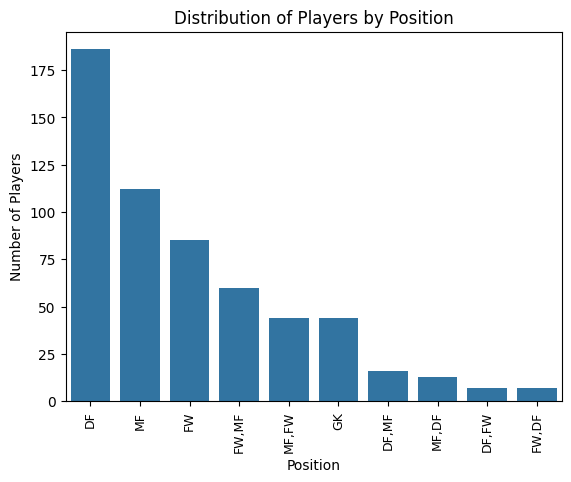

In [41]:
##ii. Distribution of positions (DF, MF, FW, etc.)
position_counts = df.groupby('Pos')[['Pos']].value_counts().reset_index().sort_values(by= 'count', ascending= False)
position_counts

sns.barplot(data=position_counts, x='Pos', y= 'count')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.title('Distribution of Players by Position')
plt.xticks(rotation=90, font={'size': 9})
plt.show()


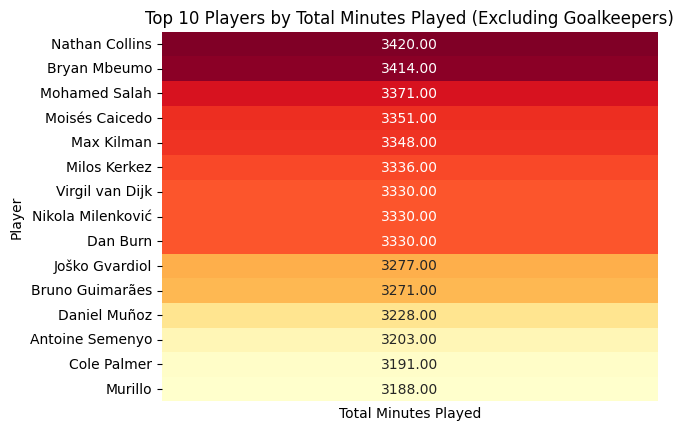

In [42]:
##iii. Total and average minutes played per player

total_min_played = ( df.groupby(['Player', 'Pos', 'Squad'])['Min']
.sum().reset_index()
.sort_values(by='Min', ascending=False)
)
total_min_played.head()

total_min_played_not_gk = total_min_played[total_min_played['Player'].isin(df[df['Pos'] != 'GK']['Player'])]
total_min_played_not_gk.head(15)

df['Min_per_game'] = df['Min'] / df['MP']

df['Min_per_game'] = df['Min_per_game'].round(2)
avg_min_played = df[df['Pos']!= 'GK'][['Player', 'Pos','Squad', 'Min_per_game']].sort_values(by='Min_per_game', ascending=False).head(15)

total_min_played_not_gk.head(10)
total_min_played.head(10)

avg_min_played.head(15)

##Plot total minutes played
sns.heatmap(
    total_min_played_not_gk.head(15).set_index('Player')[['Min']], 
    annot=True, 
    fmt='.2f',
    cmap='YlOrRd', 
    cbar=False,
    xticklabels=False)

plt.xlabel('Total Minutes Played')    
plt.ylabel('Player')
plt.title('Top 10 Players by Total Minutes Played (Excluding Goalkeepers)')
plt.xticks(rotation=90)
plt.show()


Is there a correlation between position and total minutes played? 

 And why is this information important? 
It is important because it helps to understand the role and contribution of different positions on the field. 
For example, midfielders often play more minutes due to their central role in both offense and defense, while forwards may have fewer minutes due to substitutions or tactical changes.
 Also, understanding this correlation can help in player management, training focus, and game strategy development.
 Also, when teams are working towards squad depth, it is important to know which positions require more rotation and for transfers
 For instance, having deep squad of defenders may not be cost effective if they are all able to play 90 minutes every game. It means there will be some players who won't get game time.
 Obviously this is a case by case basis but it is important to consider. For instance, we believe defenders play more minutes than forwards because they are less likely to be substituted and often have a more consistent role throughout the game. However, we see Bryan Mbeumo and Mo Salah putting up a lot of minutes last season
 However, we can compare their average minutes played compared to other forwards to see if they are outliers.

C:\Users\osaze\AppData\Local\Temp\ipykernel_23572\2531710832.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'Forwards (n={group_sizes[True]})',


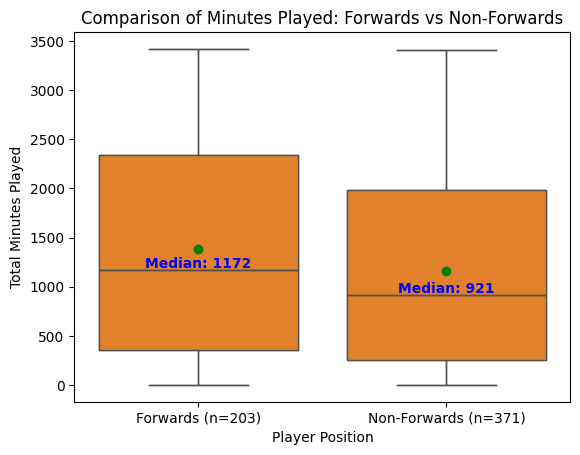

In [48]:
# Compare total average minutes played by forwards vs non-forwards
df['is_FW'] = df['Pos'].str.contains("FW", case=False, na=False) & ~df['Pos'].str.contains("GK", case=False, na=False)

# Now get average minutes for forwards vs non-forwards
avg_total_fw_minutes = df.groupby('is_FW')['Min'].mean().round(2).reset_index()

avg_total_fw_minutes

ax = sns.boxplot(data=df, x="is_FW", y="Min")
group_sizes = df['is_FW'].value_counts()
ax.set_xticklabels([f'Forwards (n={group_sizes[True]})',
                    f'Non-Forwards (n={group_sizes[False]})'])


sns.boxplot(data=df, x="is_FW", y="Min", showmeans=True,
            meanprops={"marker":"o","markerfacecolor":"green","markeredgecolor":"green"})
# Calculate median per group
medians = df.groupby('is_FW')['Min'].median()

# Annotate the median on the plot
for i, med in enumerate(medians):
    ax.text(i, med + 20, f'Median: {med:.0f}', 
            horizontalalignment='center', 
            color='blue', 
            weight='bold')

plt.ylabel('Total Minutes Played')
plt.xlabel('Player Position')
plt.title('Comparison of Minutes Played: Forwards vs Non-Forwards')
plt.show()




Correlation between Min and DF: 0.03
Correlation between Min and FW: -0.10
Correlation between Min and GK: 0.07
Correlation between Min and MF: -0.05


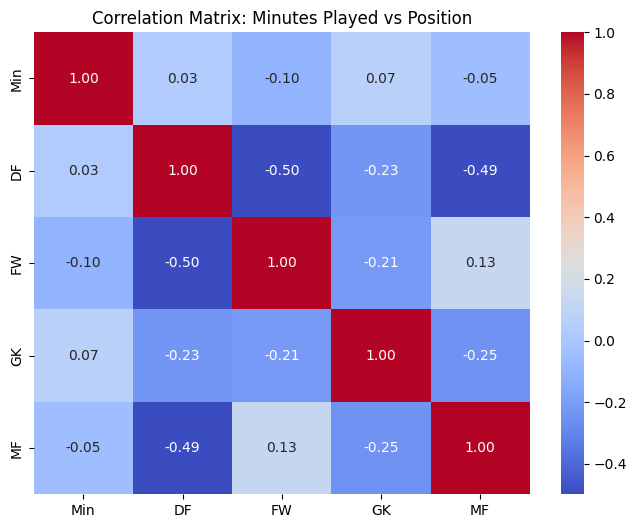

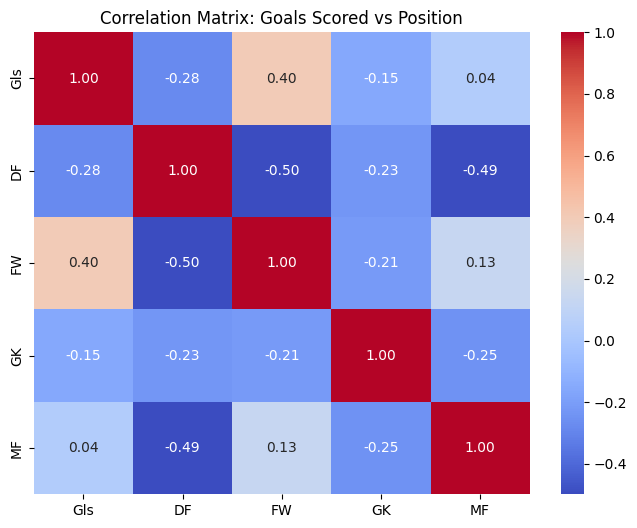

ANOVA F-statistic: 2.393651443217198
ANOVA p-value: 0.06726113240868739


In [ ]:
# Correlation between position and minutes played
#Create dummy variables for position since it is categorical data
#get_dummies(sep=',') helps to split positions like "FW,MF" into separate columns.
## this helps to create binary columns for each position. Hence a player with "FW,MF" will have 1 in both FW and MF columns.

# Create dummy variables for positions
pos_dummies = df['Pos'].str.get_dummies(sep=',')
df_with_dummies = pd.concat([df, pos_dummies], axis=1)

# Select relevant columns for correlation
positions = ['DF', 'FW', 'GK', 'MF']
correlation_matrix = df_with_dummies[['Min'] + positions].corr()

# Print individual correlations
for pos in positions:
    corr_val = df_with_dummies['Min'].corr(df_with_dummies[pos])
    print(f"Correlation between Min and {pos}: {corr_val:.2f}")

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Minutes Played vs Position')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_goals, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Goals Scored vs Position')
plt.show()
from scipy import stats

# Group minutes by position
df_minutes_by_pos = [df_with_dummies[df_with_dummies['Pos'].str.contains(pos, na=False)]['Min']
                     for pos in ['DF', 'FW', 'GK', 'MF']]

#ANOVA (Analysis of Variance) is exactly the right next step, because it tests whether the means of minutes played differ significantly across groups (positions).
# Run one-way ANOVA
f_stat, p_val = stats.f_oneway(*df_minutes_by_pos)

print("ANOVA F-statistic:", f_stat)
print("ANOVA p-value:", p_val)




C:\Users\osaze\AppData\Local\Temp\ipykernel_23572\1382945902.py:14: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


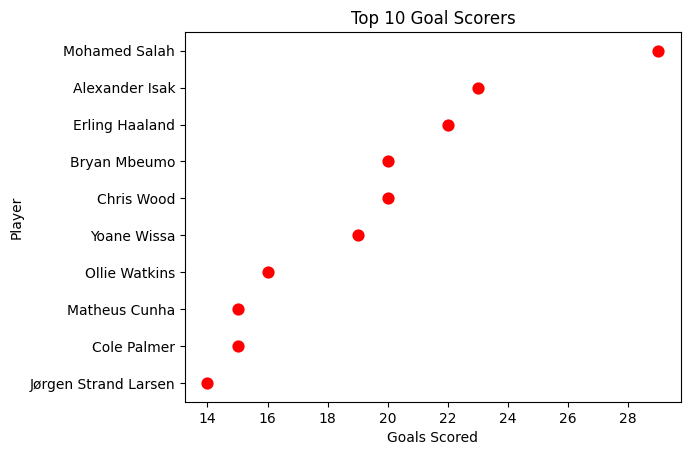

C:\Users\osaze\AppData\Local\Temp\ipykernel_23572\1382945902.py:24: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


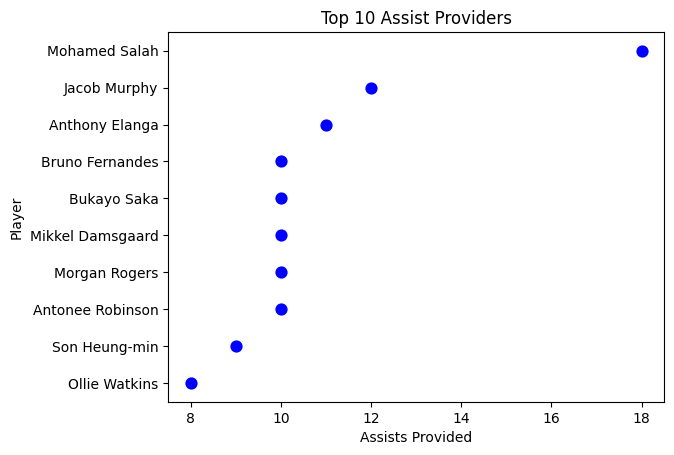

In [44]:
##Top Performers
#Top goal scorers (G)
#Top assist providers (Ast)
#Players with highest xG (expected goals) and xAG (expected assists)
top_goal_scorers = df[['Player', 'Squad', 'Pos', 'Gls']].sort_values(by='Gls', ascending=False).head(10)
top_assist_providers = df[['Player', 'Squad', 'Pos', 'Ast']].sort_values(by='Ast', ascending=False).head(10)
top_xg_players = df[['Player', 'Squad', 'Pos', 'xG']].sort_values(by='xG', ascending=False).head(10)
top_xag_players = df[['Player', 'Squad', 'Pos', 'xAG']].sort_values(by='xAG', ascending=False).head(10) 
top_goal_scorers
top_assist_providers
top_xg_players
top_xag_players

sns.pointplot(
    x="Gls", y="Player", 
    data=top_goal_scorers, 
    join=False, color="red"
)
plt.xlabel('Goals Scored')
plt.ylabel('Player')
plt.title('Top 10 Goal Scorers')
plt.show()

sns.pointplot(
    x="Ast", y="Player", 
    data=top_assist_providers,
    join=False, color="blue"
)
plt.xlabel('Assists Provided')
plt.ylabel('Player')
plt.title('Top 10 Assist Providers')
plt.show()



In [45]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY',
       'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1',
       'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'Matches', 'Min_per_game', 'is_FW'],
      dtype='object')

In [101]:

df[df['Pos']=='DF,FW']

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,Min_per_game,is_FW
159,160,Samuel Edozie,ENG,"DF,FW",Southampton,21.0,2003.0,2,0,65,...,0.00,0.00,0.00,0.14,0.14,0.00,0.14,Matches,32.50,True
204,205,Rodrigo Gomes,POR,"DF,FW",Wolves,21.0,2003.0,25,7,810,...,0.22,0.22,0.08,0.10,0.18,0.08,0.18,Matches,32.40,True
265,266,Ben Johnson,ENG,"DF,FW",Ipswich Town,24.0,2000.0,23,14,1354,...,0.07,0.20,0.07,0.09,0.16,0.07,0.16,Matches,58.87,True
306,307,Keane Lewis-Potter,ENG,"DF,FW",Brentford,23.0,2001.0,38,36,3093,...,0.03,0.12,0.09,0.09,0.18,0.09,0.18,Matches,81.39,True
457,458,Oliver Scarles,ENG,"DF,FW",West Ham,18.0,2005.0,15,7,665,...,0.00,0.00,0.01,0.01,0.03,0.01,0.03,Matches,44.33,True
481,482,Julio Soler,ARG,"DF,FW",Bournemouth,19.0,2005.0,3,0,11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches,3.67,True
509,510,Kieran Tierney,SCO,"DF,FW",Arsenal,27.0,1997.0,13,2,259,...,0.35,0.35,0.12,0.48,0.60,0.12,0.60,Matches,19.92,True
